In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
import sklearn.discriminant_analysis
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Primera Parte

## a

In [164]:
data=pd.read_csv('reprocessed.hungarian.data.csv',sep=' ')
data= np.array(data.dropna())
x=data[:,:12]
y=data[:,13]

In [185]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.5)

In [187]:
n_trees=np.arange(1,100)
error_bc=[]
error_rdf=[]
oob_error_bc_=[]
oob_error_rdf_=[]
for i in range(len(n_trees)):
    bc = BaggingClassifier(n_estimators=n_trees[i])
    bc = bc.fit(x_train,y_train)
    acu_bc = bc.score(x_test,y_test)
    error_bc.append(1-acu_bc)
    rdf = RandomForestClassifier(n_estimators=n_trees[i])
    rdf = rdf.fit(x_train,y_train)
    acu_rdf = rdf.score(x_test,y_test)
    error_rdf.append(1-acu_rdf)
    bc_oob = BaggingClassifier(n_estimators=n_trees[i],oob_score=True)
    bc_oob = bc_oob.fit(x_train,y_train)
    oob_error_bc_.append(1-bc_oob.oob_score_)
    rdf_oob = RandomForestClassifier(n_estimators=n_trees[i],oob_score=True)
    rdf_oob = rdf_oob.fit(x_train,y_train)
    oob_error_rdf_.append(1 - rdf_oob.oob_score_)

C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. Th

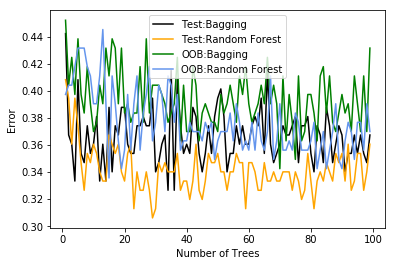

In [188]:
plt.plot(n_trees,error_bc,label='Test:Bagging', color='black')
plt.plot(n_trees,error_rdf,label='Test:Random Forest', color='orange')
plt.plot(n_trees,oob_error_bc_, label='OOB:Bagging', color='green')
plt.plot(n_trees,oob_error_rdf_,label='OOB:Random Forest',color='cornflowerblue')
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.legend()

## b

In [193]:
data=pd.read_csv('OJ.csv')
data= data.dropna()
WeekofPurchase=data['WeekofPurchase']
StoreID=data['StoreID']
PriceCH=data['PriceCH'] 
PriceMM=data['PriceMM']
DiscCH=data['DiscCH']
DiscMM=data['DiscMM']
SpecialCH=data['SpecialCH']
SpecialMM=data['SpecialMM'] 
LoyalCH=data['LoyalCH']
SalePriceMM=data['SalePriceMM']
SalePriceCH=data['SalePriceCH']
PriceDiff=data['PriceDiff']
PctDiscMM=data['PctDiscMM']
PctDiscCH=data['PctDiscCH']
ListPriceDiff=data['ListPriceDiff']
STORE=data['STORE']
Purchase=list(data['Purchase'])
purchase=[]
for i in range(len(Purchase)):
    if Purchase[i]=='CH':
        purchase.append(1)
    if Purchase[i]=='MM':
        purchase.append(0)
x=(np.array([WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE])).T
y=np.array(purchase)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=1)

In [198]:
n_trees=np.arange(1,100)
error_rdf_p=[]
error_rdf_sqrtp=[]
error_rdf_p_2=[]
for i in range(len(n_trees)):
    rdf = RandomForestClassifier(n_estimators=n_trees[i],max_features=16)
    rdf = rdf.fit(x_train,y_train)
    acu_rdf = rdf.score(x_test,y_test)
    error_rdf_p.append(1-acu_rdf)
for i in range(len(n_trees)):
    rdf = RandomForestClassifier(n_estimators=n_trees[i],max_features=4)
    rdf = rdf.fit(x_train,y_train)
    acu_rdf = rdf.score(x_test,y_test)
    error_rdf_sqrtp.append(1-acu_rdf)
for i in range(len(n_trees)):
    rdf = RandomForestClassifier(n_estimators=n_trees[i],max_features=8)
    rdf = rdf.fit(x_train,y_train)
    acu_rdf = rdf.score(x_test,y_test)
    error_rdf_p_2.append(1-acu_rdf)
   

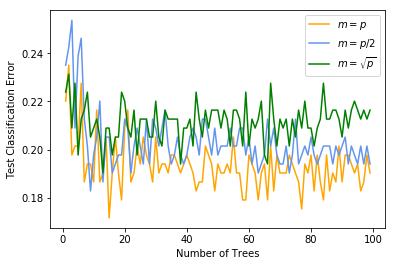

In [201]:
plt.plot(n_trees,error_rdf_p,label=r'$m=p$', color='orange')
plt.plot(n_trees,error_rdf_p_2, label=r'$m=p/2$', color='cornflowerblue')
plt.plot(n_trees,error_rdf_sqrtp,label=r'$m=\sqrt{p}$', color='green')
plt.ylabel('Test Classification Error')
plt.xlabel('Number of Trees')
plt.legend()

# Segunda parte

In [205]:
data=pd.read_csv('OJ.csv')
data= data.dropna()
WeekofPurchase=data['WeekofPurchase']
StoreID=data['StoreID']
PriceCH=data['PriceCH'] 
PriceMM=data['PriceMM']
DiscCH=data['DiscCH']
DiscMM=data['DiscMM']
SpecialCH=data['SpecialCH']
SpecialMM=data['SpecialMM'] 
LoyalCH=data['LoyalCH']
SalePriceMM=data['SalePriceMM']
SalePriceCH=data['SalePriceCH']
PriceDiff=data['PriceDiff']
PctDiscMM=data['PctDiscMM']
PctDiscCH=data['PctDiscCH']
ListPriceDiff=data['ListPriceDiff']
STORE=data['STORE']
Purchase=list(data['Purchase'])
purchase=[]
for i in range(len(Purchase)):
    if Purchase[i]=='CH':
        purchase.append(1)
    if Purchase[i]=='MM':
        purchase.append(0)
x=(np.array([WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE])).T
y=np.array(purchase)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=1)

In [206]:
lr = sklearn.linear_model.LogisticRegression()
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

In [210]:
lr.fit(x_train, y_train)

# Predict with test
predict = lr.predict(x_test)

# This is the probability for Default='Yes'
proba_yes = lr.predict_proba(x_test)[:,1]

# loop over n_p different values for the threshold probabiity
n_p = 100
error_rate = np.zeros(n_p)
precision_lr = np.zeros(n_p)
recall_lr = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 1
    predict[~ii] = 0
    true_positive = (y_test == 1) & (predict == 1) 
    false_positive = (y_test == 0) & (predict == 1)
    false_negative = (y_test == 1) & (predict == 0)
    true_negative = (y_test == 0) & (predict == 0)
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision_lr[i] = n_tp/(n_tp + n_fp)  
    if((n_tp+n_fn)>0): recall_lr[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall_lr[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

        


C:\Users\Beatriz\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5,1,'PRECISION-RECALL')

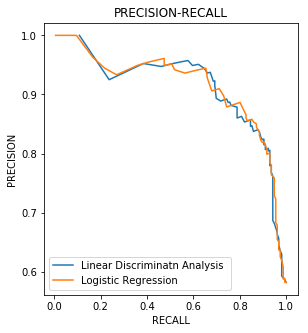

In [214]:
lda.fit(x_train, y_train)

# Predict with test
predict = lda.predict(x_test)

# This is the probability for Default='Yes'
proba_yes = lda.predict_proba(x_test)[:,1]

# loop over n_p different values for the threshold probabiity
n_p = 100
error_rate = np.zeros(n_p)
precision_lda = np.zeros(n_p)
recall_lda = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 1
    predict[~ii] = 0
    true_positive = (y_test == 1) & (predict == 1) 
    false_positive = (y_test == 0) & (predict == 1)
    false_negative = (y_test == 1) & (predict == 0)
    true_negative = (y_test == 0) & (predict == 0)
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision_lda[i] = n_tp/(n_tp + n_fp)  
    if((n_tp+n_fn)>0): recall_lda[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall_lda[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

        
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(recall_lda, precision_lda, label='Linear Discriminatn Analysis ')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.legend()
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
